In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
movies_data = pd.read_csv('/home/hitesh/Desktop/Github/Movie-Recommendation-System/Movielens dataset/movie_data_final (1).csv')
movies_data.head()

,movieId,imdbId,tmdbId,cast,crew,director,keywords,adult,belongs_to_collection,budget,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,1,114709,862.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,jealousy|toy|boy|friendship|friends|rivalry|bo...,False,Toy Story Collection,30000000,...,373554033.0,81.0,English,Released,NaN,Toy Story,False,7.7,5415.0,1995
1,2,113497,8844.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,board game|disappearance|based on children's b...,False,NaN,65000000,...,262797249.0,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,3,113228,15602.0,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,fishing|best friend|duringcreditsstinger|old men,False,Grumpy Old Men Collection,0,...,0.0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,4,114885,31357.0,Whitney Houston|Angela Bassett|Loretta Devine|...,"[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,based on novel|interracial relationship|single...,False,NaN,16000000,...,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,5,113041,11862.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,baby|midlife crisis|confidence|aging|daughter|...,False,Father of the Bride Collection,0,...,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995


In [45]:
ratings_data = pd.read_csv('/home/hitesh/Desktop/Github/Movie-Recommendation-System/Movielens dataset/ratings.csv')
ratings_data.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
print('Movies_df Shape:',movies_data.shape)
print('Ratings_df Shape:',ratings_data.shape)

Movies_df Shape: (9082, 31)
Ratings_df Shape: (95490, 4)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
movies_data['director'] = movies_data['director'].fillna('')
movies_data['director'] = movies_data['director'].str.replace('|', ' ')
tfidf_matrix_director = tfidf.fit_transform(movies_data['director'])
tfidf_matrix_director.shape

(9082, 4525)

In [35]:
movies_data['cast'] = movies_data['cast'].fillna('')
movies_data['cast'] = movies_data['cast'].str.replace('|', ' ')
tfidf_matrix_cast = tfidf.fit_transform(movies_data['cast'])
tfidf_matrix_cast.shape

(9082, 15344)

In [36]:
movies_data['keywords'] = movies_data['keywords'].fillna('')
movies_data['keywords'] = movies_data['keywords'].str.replace('|', ' ')
tfidf_matrix_keywords = tfidf.fit_transform(movies_data['keywords'])
tfidf_matrix_keywords.shape

(9082, 8899)

In [37]:
movies_data['production_companies'] = movies_data['production_companies'].fillna('')
movies_data['production_companies'] = movies_data['production_companies'].str.replace('|', ' ')
tfidf_matrix_pc = tfidf.fit_transform(movies_data['production_companies'])
tfidf_matrix_pc.shape

(9082, 6806)

In [38]:
genres = movies_data['genres'].str.get_dummies('|')
genres.shape

(9082, 20)

In [39]:
## merge all the features
from scipy.sparse import hstack
tfidf_matrix = hstack((tfidf_matrix_director, tfidf_matrix_cast, tfidf_matrix_keywords, tfidf_matrix_pc, genres))
tfidf_matrix.shape

(9082, 35594)

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [44]:
import tqdm
A = np.full((610,9082), np.nan)
for i in tqdm.tqdm(range(len(ratings_data))):
    try:
        A[int(ratings_data.iloc[i][0]-1)][movies_data[movies_data['movieId'] == ratings_data.iloc[i][1]].index[0]] = ratings_data.iloc[i][2]
    except:
        print(i)

100%|██████████| 95490/95490 [00:47<00:00, 1997.66it/s]


In [46]:
A.shape
A_tensor = torch.tensor(A)

In [47]:
A_tensor

tensor([[4.0000,    nan, 4.0000,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        ...,
        [2.5000, 2.0000, 2.0000,  ...,    nan,    nan,    nan],
        [3.0000,    nan,    nan,  ...,    nan,    nan,    nan],
        [5.0000,    nan,    nan,  ...,    nan,    nan,    nan]],
       dtype=torch.float64)

In [48]:
mask = ~torch.isnan(A_tensor)
mask

tensor([[ True, False,  True,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False]])

In [49]:
mask.sum()

tensor(95490)

In [53]:
## how to conver tfidf matrix to tensor
tfidf_matrix_tensor = torch.tensor(tfidf_matrix.todense())

In [54]:
H = tfidf_matrix_tensor.T
H

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [55]:
H.shape

torch.Size([35594, 9082])

In [56]:
W = torch.randn(A_tensor.shape[0], 35594, requires_grad=True)
optimizer = optim.Adam([W, H], lr=0.05)
loss_vector = []
steps = []
for i in tqdm.tqdm(range(1000)):
    steps.append(i)
    diff_matrix = torch.mm(W, H.float()) - A_tensor.float()
    diff_vector = diff_matrix[mask]
    loss = torch.norm(diff_vector)
    loss_vector.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

  0%|          | 0/1000 [00:00<?, ?it/s]

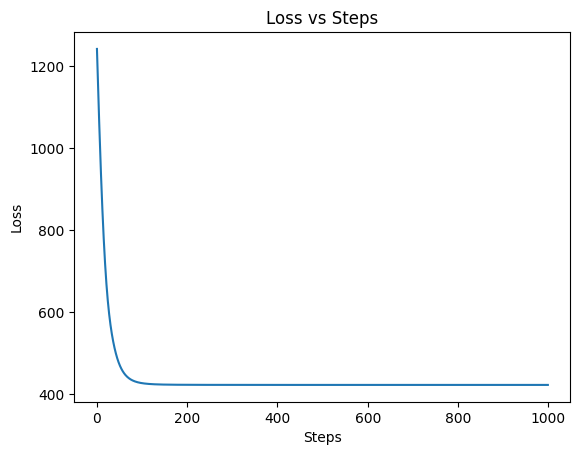

In [125]:
plt.plot(steps, loss_vector)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss vs Steps')
plt.show()


In [126]:
torch.mm(W, H.float())

tensor([[ 5.6664,  2.8977,  3.0132,  ...,  2.0458,  2.1567,  1.9199],
        [ 1.8034, -0.4165,  4.9985,  ...,  2.5648,  0.0426,  3.0633],
        [ 3.4660,  2.1683,  0.5750,  ..., -0.0644,  1.3162,  0.7507],
        ...,
        [ 3.4453,  1.2394,  1.8110,  ...,  1.7587,  1.5874,  1.4480],
        [ 3.0000,  2.5141,  1.9768,  ...,  1.9751, -0.0283,  1.1930],
        [ 4.3805,  1.6102,  2.4719,  ...,  1.9533,  1.9217,  1.7602]],
       grad_fn=<MmBackward0>)

In [127]:
A_tensor.float()

tensor([[4.0000,    nan, 4.0000,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        ...,
        [2.5000, 2.0000, 2.0000,  ...,    nan,    nan,    nan],
        [3.0000,    nan,    nan,  ...,    nan,    nan,    nan],
        [5.0000,    nan,    nan,  ...,    nan,    nan,    nan]])

In [106]:
def factorize(A, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], 20, requires_grad=True)
    H 
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.1)
    
    # Train the model
    for i in range(100):
        # Compute the loss
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [107]:
W, H, loss = factorize(A_tensor, 5)
loss

tensor(189.6028, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)

In [92]:
torch.mm(W, H)[mask][20:]

tensor([4.9060, 4.1155, 4.1711,  ..., 4.2348, 4.7364, 2.8415],
       grad_fn=<SliceBackward0>)

In [93]:
A_tensor[mask][20:]

tensor([4., 5., 4.,  ..., 5., 5., 3.], dtype=torch.float64)